# Decision Trees

The decision tree algorithm as described in the README.md file will be used to predict whether or not a country has a high or low mortality rate from CVD (cardiovascular disease), cancer, diabetes or CRD (chronic respiratory disease) between exact ages 30 and 70. Here, features will include various human developement index metrics, such as govt and out-of-pocket expenditure per capita for health care, domestic spending on healthcare, air pollution, etc. For classification, the two features I will be using are domestic general government health expenditure (% of GDP) and out-of-pocket expenditure per capita for health care (current US$) High mortality rate is considered 20% or over (1) while low mortality rate is below 20%. Then, I will use regression to predict mortality rates on a continuous scale. For this implementation, I will be using the decision tree classifier and regressor algorithm in scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file with socioeconomic data
df = pd.read_csv("Data/HDIData.csv")

In [3]:
# clean up data file

# dependent variable: Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)
# isolate the following independent variables:
#		Domestic general government health expenditure (% of GDP)
#		Domestic private health expenditure per capita (current US$)
#		Out-of-pocket expenditure per capita for health care (current US$)
#		PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)

row_ind = [396, 401, 1022, 1062, 852]
col_filled = ~df.loc[row_ind].isin([".."]).any() # only keep countries with nonempty rows

fil_df = df.loc[row_ind, col_filled] # create new data table with isolated rows
fil_df.head()

,Time,Time Code,Series Name,Series Code,Argentina [ARG],Australia [AUS],Brazil [BRA],China [CHN],France [FRA],Germany [DEU],...,United Arab Emirates [ARE],Uruguay [URY],Uzbekistan [UZB],Vanuatu [VUT],"Venezuela, RB [VEN]",Viet Nam [VNM],West Bank and Gaza [PSE],"Yemen, Rep. [YEM]",Zambia [ZMB],Zimbabwe [ZWE]
396,2019,YR2019,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,6.15104055,7.53557873,3.91701889,2.99503422,8.31477833,9.04424477,...,2.2531426,6.15435123,2.24462414,1.90414143,0.81175309,2.02046871,3.66190886,0.48247319,2.25830793,0.46115124
401,2019,YR2019,Domestic private health expenditure per capita...,SH.XPD.PVTD.PC.CD,396.38448478,1449.4638642,513.20573502,237.26568152,1131.15472418,1251.60686936,...,958.19591654,565.28631767,57.55738111,11.74514181,70.75196984,99.95200594,153.53097593,31.98451715,7.2883115,13.1153355
1022,2019,YR2019,Out-of-pocket expenditure per capita (current ...,SH.XPD.OOPC.PC.CD,242.06773774,813.15610779,215.999997,189.88684592,437.48525164,726.02044273,...,240.04156615,261.68548233,56.89124751,8.58725213,38.47580321,77.21960397,122.84229516,31.56484478,6.16622984,5.00559626
1062,2019,YR2019,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,14.3996238920365,9.33099031566264,12.3488400923542,37.5475753654351,9.82524600527018,10.6378495266542,...,41.955626323257,10.298591147894,34.1331992575325,14.3364980888287,14.8507131552081,20.8317868906878,29.6822493738623,41.6407934340959,23.2037475947695,18.5286074615735
852,2019,YR2019,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.ZS,15.6,9,15.1,16,10.1,11.8,...,8.7,16.6,26.8,37.1,17.9,20.8,18.5,26.3,23.2,32.7


In [4]:
# transform data file and delete time/labels for correlations
df_transposed = fil_df.T
df_transposed.columns = df_transposed.iloc[2]
df_tree = df_transposed.iloc[4:,:]
df_tree = df_tree.astype(float)
df_tree['mortality from disease class'] = (df_tree.iloc[:,4] > 20).astype(int) # 1 if >25, 0 else
print(df_tree['mortality from disease class'].value_counts()) # how many 1s and 0s
df_tree.head()

mortality from disease class
1    93
0    90
Name: count, dtype: int64


Series Name,Domestic general government health expenditure (% of GDP),Domestic private health expenditure per capita (current US$),Out-of-pocket expenditure per capita (current US$),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)",mortality from disease class
Argentina [ARG],6.151041,396.384485,242.067738,14.399624,15.6,0
Australia [AUS],7.535579,1449.463864,813.156108,9.330990,9.0,0
Brazil [BRA],3.917019,513.205735,215.999997,12.348840,15.1,0
China [CHN],2.995034,237.265682,189.886846,37.547575,16.0,0
France [FRA],8.314778,1131.154724,437.485252,9.825246,10.1,0


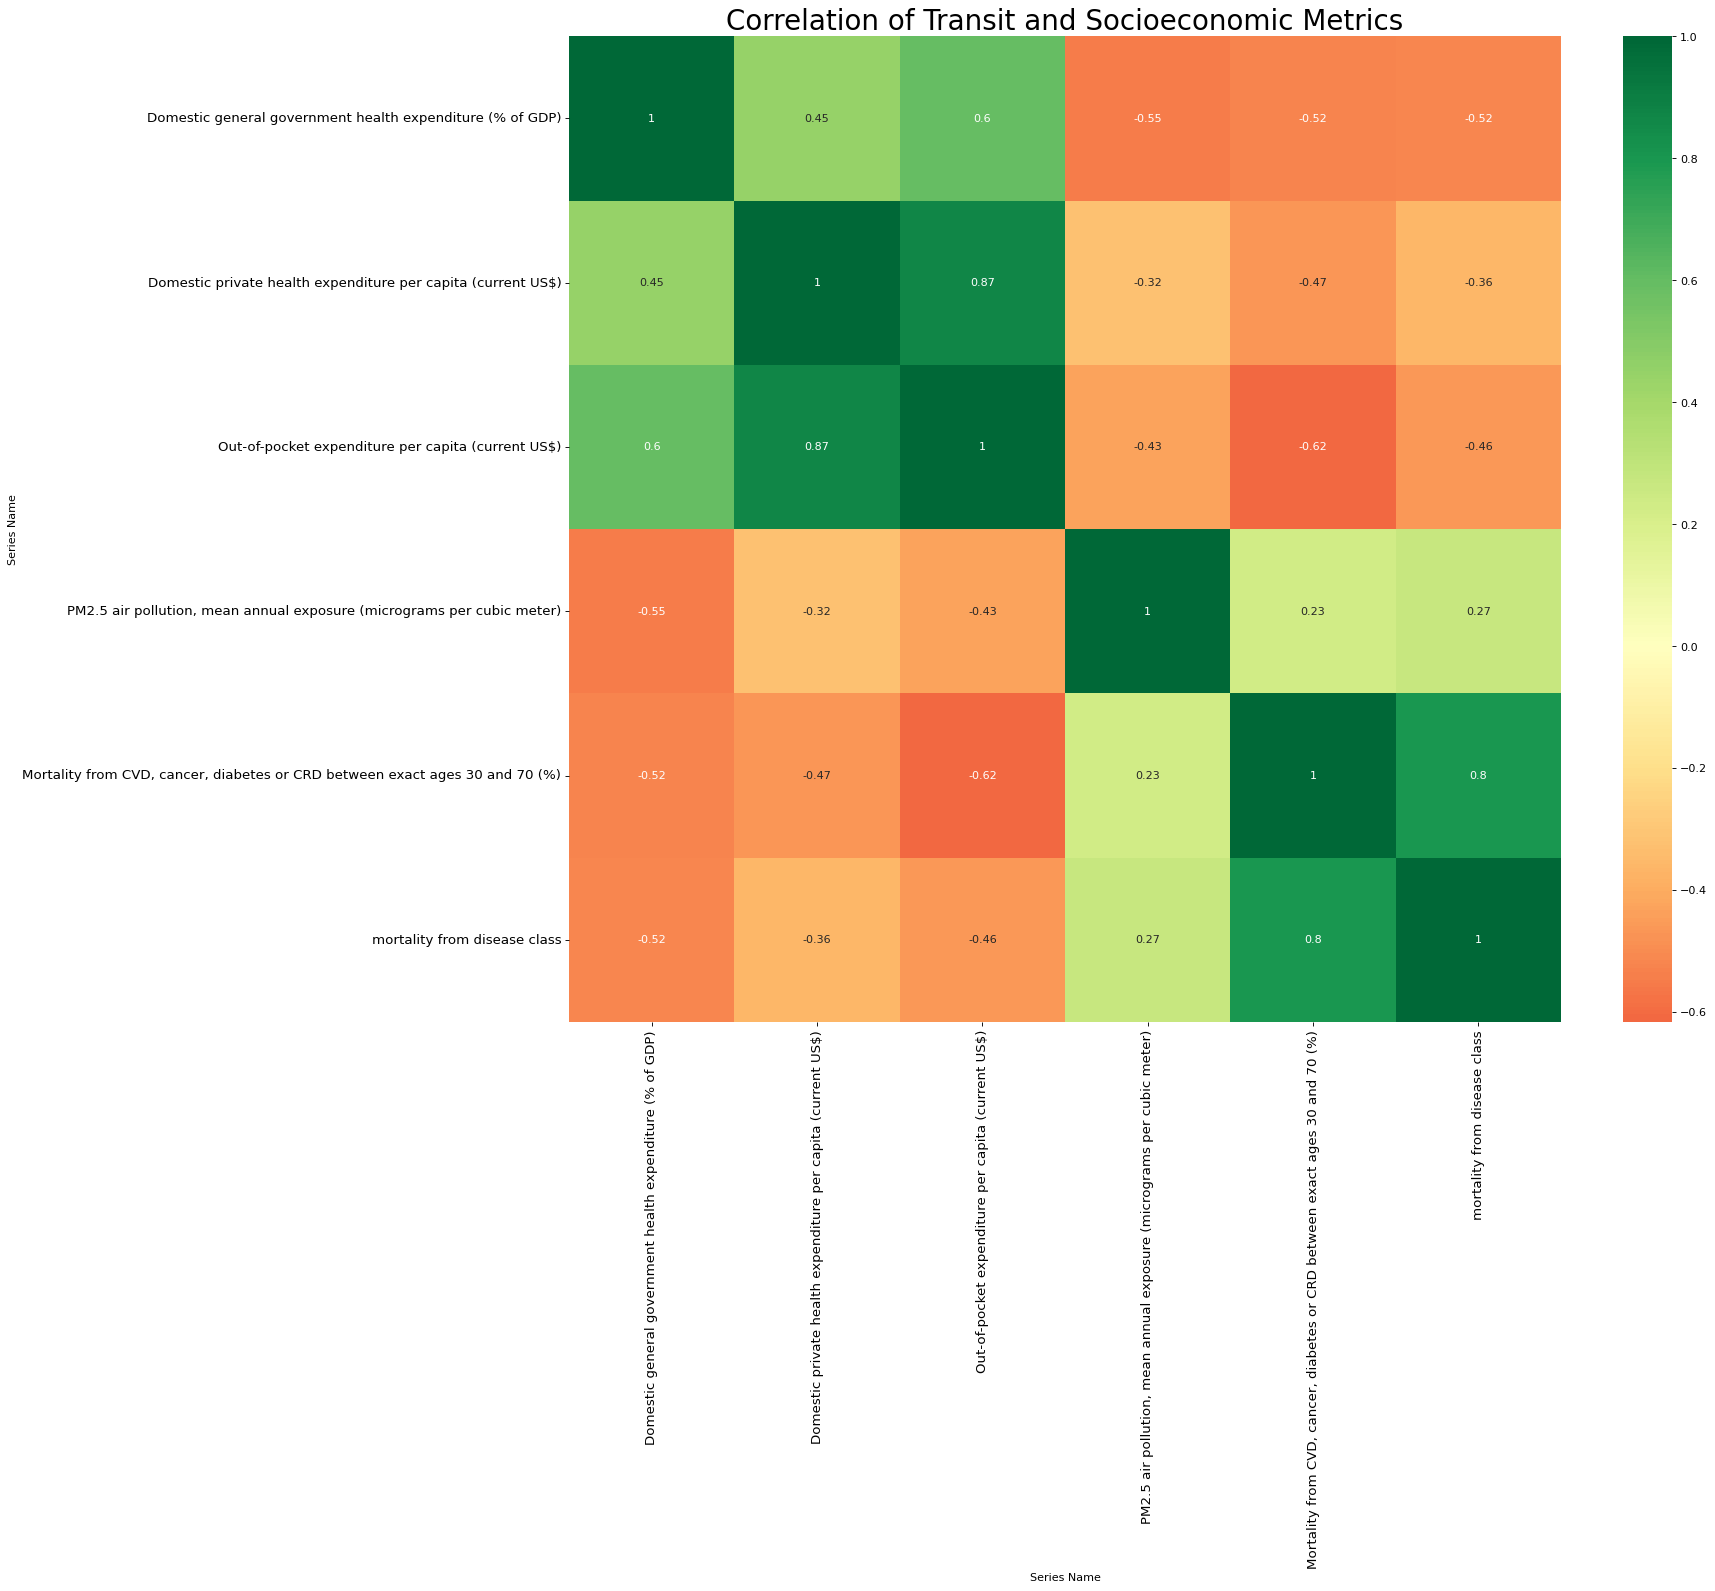

In [5]:
# plot correlation chart
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(df_tree.corr(), xticklabels=df_tree.corr().columns, yticklabels=df_tree.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation of Transit and Socioeconomic Metrics', fontsize=25)
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics 

In [7]:
# split X and y

# split X and target y
X = df_tree.iloc[:,[0, 2]]
y = df_tree.iloc[:,5]

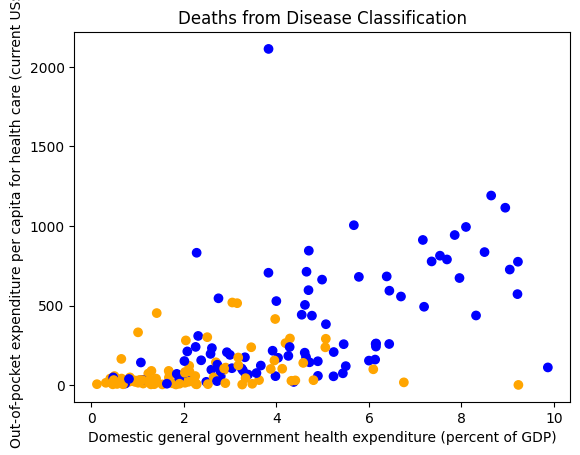

In [8]:
# plot the division between classes

colors = ['blue' if y.iloc[i] == 0 else 'orange' for i in range(len(y))]

plt.figure()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors)
plt.title ('Deaths from Disease Classification')
plt.xlabel ('Domestic general government health expenditure (percent of GDP)')
plt.ylabel ('Out-of-pocket expenditure per capita for health care (current US$)')
plt.show ()

In [9]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Classification

In [10]:
# fit training data

decision_tree = DecisionTreeClassifier(max_depth=4, random_state =42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [11]:
# print metrics and precision of trained model

print (metrics.classification_report (y_test, decision_tree.predict (X_test)))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        37
           1       0.76      0.70      0.73        37

    accuracy                           0.74        74
   macro avg       0.74      0.74      0.74        74
weighted avg       0.74      0.74      0.74        74



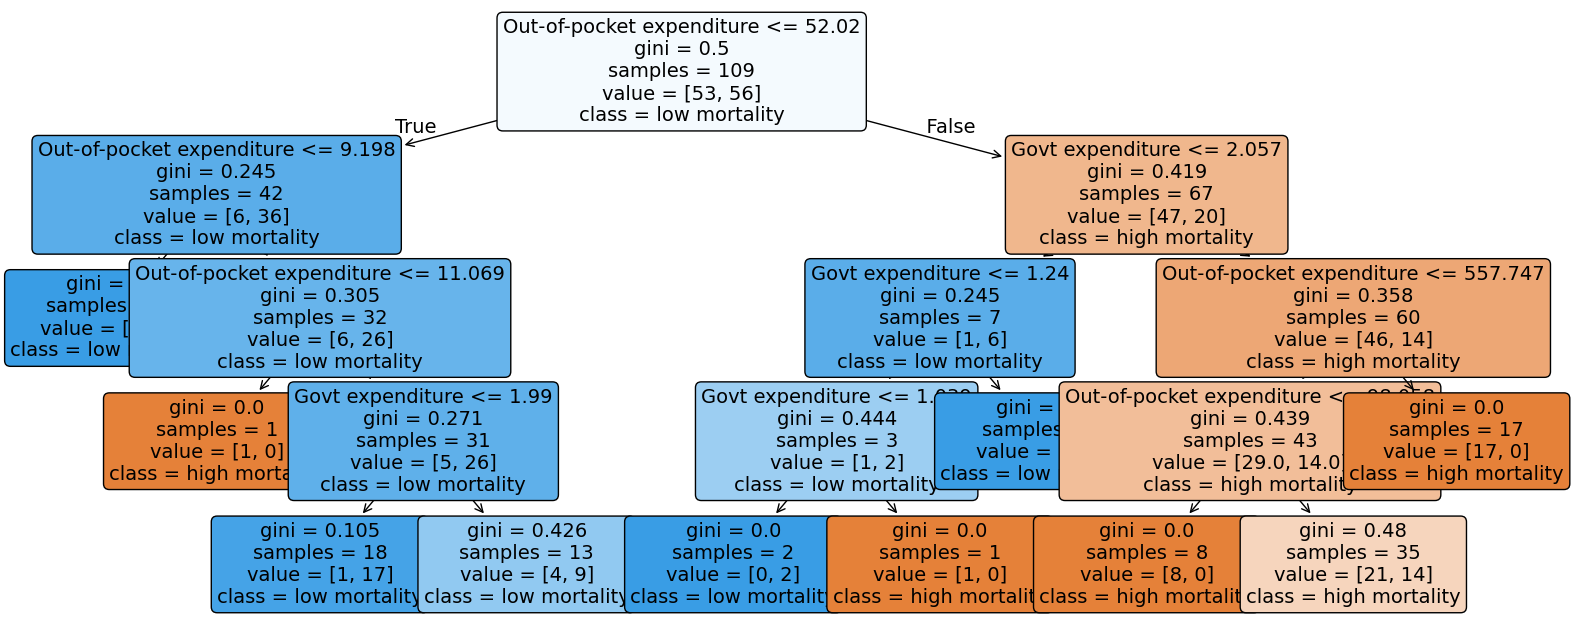

In [12]:
# visualize decision tree

features = ['Govt expenditure','Out-of-pocket expenditure']
labels = ['high mortality', 'low mortality']

plt.figure (figsize =(20,8))
a = tree.plot_tree (decision_tree, feature_names = features, class_names = labels, rounded = True, filled = True, fontsize =14)
plt.show()

In [13]:
!pip install mlxtend


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


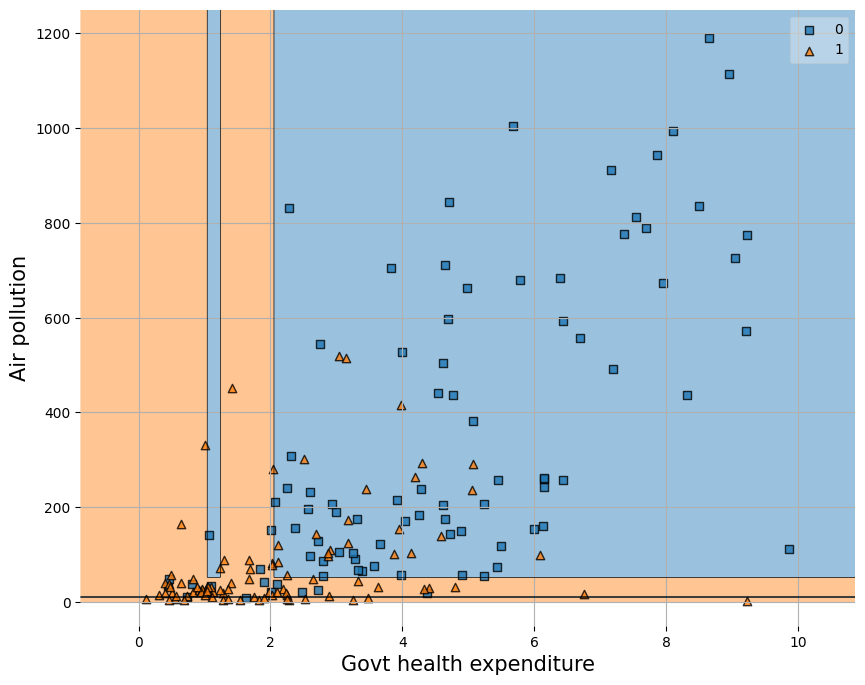

In [14]:
from mlxtend.plotting import plot_decision_regions

X_array = X.iloc[:,:].values
y_array = y.iloc[:].values

plt.figure(figsize = (10, 8))
plot_decision_regions(X_array, y_array, clf = decision_tree)
plt.xlabel("Govt health expenditure", fontsize = 15)
plt.ylabel("Air pollution", fontsize = 15)
plt.ylim(-50,1250)
plt.grid()
plt.show()

accuracy score = 0.74


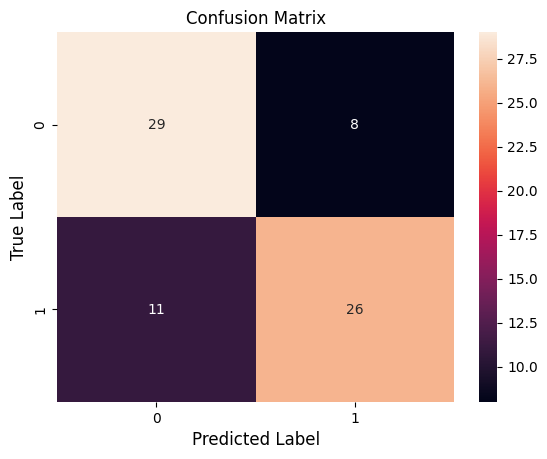

In [15]:
# test the model

y_pred = decision_tree.predict (X_test)

# The confusion matrix
cm = metrics.confusion_matrix (y_test, y_pred)

plt.figure()
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

print (f'accuracy score = {metrics.accuracy_score (y_test, y_pred):.2f}')


### Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# split X and y

# split X and target y
X_reg = df_tree.iloc[:,[0,2]]
y_reg = df_tree.iloc[:,4]

In [30]:
# train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42)

In [33]:
reg_model = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

print("R² Score:", r2_score(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))

R² Score: 0.30070977441020663
MSE: 31.893933773167106


### Conclusion

Using decision trees, it is possible to understand the general trend of mortality rates associated with diseases (heart disease, cancer, etc.) as they are impacted by health care expenditures. With government and out-of-pocket expenditures, classifying a country as having high mortality rates or low mortality rates is mildly accurate at 74%. When we shift over to continuous, regression, the model is much less predictive and has a low R^2 score along with a high mean squared error. Overall, it would make sense that higher spending on health care would make mortality rates lower. It would be interesting to find enough data to understand how a feature outlining the percent of people who cannot afford healthcare could predict mortality rates.